## Example using GNURadio to process a sample file

In [31]:
# Grabbing the Doorbell sample
#!wget https://gitlab.com/jumson/sdr-samples/raw/master/doorbell_315_8000000
infile = './doorbell_315_8000000.cut.iq'
threshold = .025
outfile_slice = './doorbell_315_8000000.' + str(threshold) + '.slice'
outfile_slice
#!ls

'./doorbell_315_8000000.0.025.slice'

In [32]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
##################################################
# GNU Radio Python Flow Graph
# Title: MOD_4_OOK_Demod
# Author: Jon Munson
# Description: This demodulated OOK RAQ file to a binary sliced file
# Generated: Sat Oct 20 13:45:14 2018
##################################################

In [33]:
from gnuradio import blocks
from gnuradio import digital
from gnuradio import eng_notation
from gnuradio import filter
from gnuradio import gr
from gnuradio.eng_option import eng_option
from gnuradio.filter import firdes
from optparse import OptionParser

In [87]:
class ASK_Slice(gr.top_block):

    def __init__(self, threshold=threshold):
        gr.top_block.__init__(self, "ASK_Slice")

        ##################################################
        # Variables
        ##################################################
        self.working_samp_rate = working_samp_rate = 400000
        self.samp_rate = samp_rate = 8e6
        self.threshold = threshold
        self.offset = offset = 0
        self.filter_transition = filter_transition = 10e3
        self.filter_decimation = filter_decimation = int(samp_rate/working_samp_rate)
        self.filter_cutoff = filter_cutoff = 100e3

        ##################################################
        # Blocks
        ##################################################
        self.throttle = blocks.throttle(gr.sizeof_gr_complex*1, working_samp_rate,True)
        self.multiply_constant = blocks.multiply_const_vcc((4, ))
        self.freq_xlating_fir_filter = filter.freq_xlating_fir_filter_ccc(filter_decimation, (firdes.low_pass(1, samp_rate, filter_cutoff, filter_transition)), offset, samp_rate)
        self.file_source = blocks.file_source(gr.sizeof_gr_complex*1, infile, False)
        self.file_sink_0 = blocks.file_sink(gr.sizeof_float*1, outfile_slice, False)
        self.file_sink_0.set_unbuffered(False)
        self.digital_binary_slicer = digital.binary_slicer_fb()
        self.complex_to_mag_squared = blocks.complex_to_mag_squared(1)
        self.blocks_uchar_to_float_0 = blocks.uchar_to_float()
        self.add_const = blocks.add_const_vff((-1*threshold, ))

        ##################################################
        # Connections
        ##################################################
        self.connect((self.add_const, 0), (self.digital_binary_slicer, 0))
        self.connect((self.blocks_uchar_to_float_0, 0), (self.file_sink_0, 0))
        self.connect((self.complex_to_mag_squared, 0), (self.add_const, 0))
        self.connect((self.digital_binary_slicer, 0), (self.blocks_uchar_to_float_0, 0))
        self.connect((self.file_source, 0), (self.freq_xlating_fir_filter, 0))
        self.connect((self.freq_xlating_fir_filter, 0), (self.throttle, 0))
        self.connect((self.multiply_constant, 0), (self.complex_to_mag_squared, 0))
        self.connect((self.throttle, 0), (self.multiply_constant, 0))

    def get_working_samp_rate(self):
        return self.working_samp_rate

    def set_working_samp_rate(self, working_samp_rate):
        self.working_samp_rate = working_samp_rate
        self.set_filter_decimation(int(self.samp_rate/self.working_samp_rate))
        self.throttle.set_sample_rate(self.working_samp_rate)

    def get_samp_rate(self):
        return self.samp_rate

    def set_samp_rate(self, samp_rate):
        self.samp_rate = samp_rate
        self.set_filter_decimation(int(self.samp_rate/self.working_samp_rate))
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))

    def get_threshold(self):
        return self.threshold

    def set_threshold(self, threshold):
        self.threshold = threshold
        self.add_const.set_k((-1*self.threshold, ))

    def get_offset(self):
        return self.offset

    def set_offset(self, offset):
        self.offset = offset
        self.freq_xlating_fir_filter.set_center_freq(self.offset)

    def get_filter_transition(self):
        return self.filter_transition

    def set_filter_transition(self, filter_transition):
        self.filter_transition = filter_transition
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))

    def get_filter_decimation(self):
        return self.filter_decimation

    def set_filter_decimation(self, filter_decimation):
        self.filter_decimation = filter_decimation

    def get_filter_cutoff(self):
        return self.filter_cutoff

    def set_filter_cutoff(self, filter_cutoff):
        self.filter_cutoff = filter_cutoff
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))


In [92]:
def main(threshold, top_block_cls=ASK_Slice, options=None):

    tb = top_block_cls()
    tb.start()
    tb.wait()

In [93]:
!ls

 ASK_Lab			    GNURadio_Blocks.ipynb
 binder				    out.slice.float
 doorbell_315_8000000		    README.md
 doorbell_315_8000000.0.025.slice  'The Sliced Signal 0.025_sliced-check.jpg'
 doorbell_315_8000000.025.slice     The_Sliced_Signal0.025_sliced-check.jpg
 doorbell_315_8000000.1		    Untitled.ipynb
 doorbell_315_8000000.cut.iq


In [111]:
main(threshold)

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Post GNURadio processing --- call a seperate script?
# Define variables:
signal_name = 'The_Sliced_Signal' + str(threshold)
filename = outfile_slice
samp_rate = 2e5
center_freq = 315e6
# load data into variable - take a second or two for 400MB file
dat_sliced = np.fromfile(filename, dtype="float32")
len(dat_sliced)

400000

In [113]:
def see_slices(dat=dat_sliced,b=None):
    main(threshold=threshold_val.value)
    signal_name = 'The_Sliced_Signal' + str(threshold)
    filename = outfile_slice
    dat_sliced = np.fromfile(filename, dtype="float32")
    # the x axis will be each value --
    lefty = slice_left.value
    righty = slice_right.value
    x = range(len(dat[lefty:righty]))
    # the y axis is dat 
    plt.figure(figsize=(20,5))
    #plt.scatter(x,dat[lefty:righty])
    plt.plot(x,dat[lefty:righty])
    plt.title("Binary Sliced representation")
    # plt.savefig(signal_name+"_sliced-check.jpg", bbox_inches='tight', pad_inches=0.5)
    plt.show() 

In [121]:
import ipywidgets as widgets
slice_left = widgets.IntSlider(
    value=100,
    min=0,
    max=len(dat_sliced),
    step=1,
    description='Left Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='d'
)
slice_left_text = widgets.IntText(
    value=100,
    description='',
    disabled=False
)
left_link = widgets.jslink((slice_left, 'value'), (slice_left_text, 'value'))

slice_right = widgets.IntSlider(
    value=int(len(dat_sliced)/2),
    min=0,
    max=len(dat_sliced),
    step=1,
    description='Right Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='d'
)
slice_right_text = widgets.IntText(
    value=int(len(dat_sliced)/2),
    description='',
    disabled=False
)
right_link = widgets.jslink((slice_right, 'value'), (slice_right_text, 'value'))

threshold_val = widgets.FloatSlider(
    value=.25,
    min=0,
    max=1,
    step=0.025,
    description='Threshold of Binary Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='.3f',
)
threshold_val_text = widgets.FloatText(
    value=.25,
    description='',
    disabled=False
)
threshold_link = widgets.jslink((threshold_val, 'value'), (threshold_val_text, 'value'))

button = widgets.Button(
    description='Plot',
)

@button.on_click
def plot_on_click(b):
    see_slices()

FloatSlider(value=0.25, continuous_update=False, description='Threshold of Binary Slice:', max=1.0, readout=Fa…

FloatText(value=0.25)

IntSlider(value=100, continuous_update=False, description='Left Slice:', max=400000, readout=False)

IntText(value=100)

IntSlider(value=200000, continuous_update=False, description='Right Slice:', max=400000, readout=False)

IntText(value=200000)

Button(description='Plot', style=ButtonStyle())

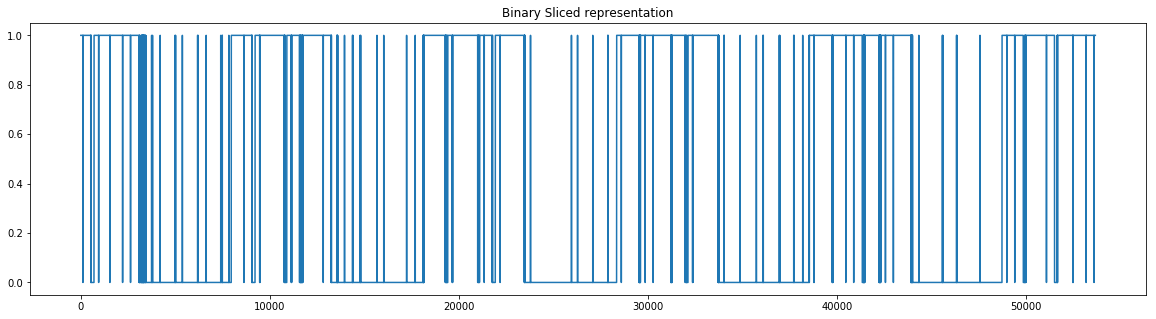

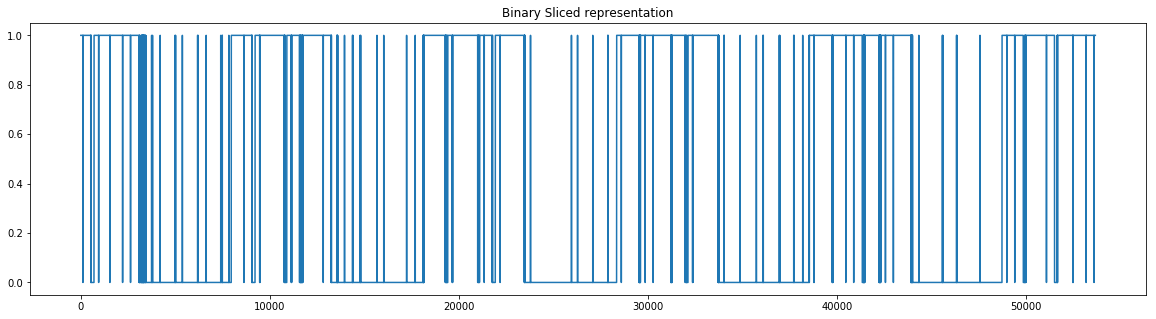

In [122]:
display(threshold_val,threshold_val_text, slice_left,slice_left_text,slice_right,slice_right_text, button)

#### A link to the file
[see pic](./The_Sliced_Signal0.025_sliced-check.jpg)


In [46]:
!ls


 ASK_Lab			    GNURadio_Blocks.ipynb
 binder				    out.slice.float
 doorbell_315_8000000		    README.md
 doorbell_315_8000000.0.025.slice   sdr-samples
 doorbell_315_8000000.025.slice    'The Sliced Signal 0.025_sliced-check.jpg'
 doorbell_315_8000000.1		    The_Sliced_Signal0.025_sliced-check.jpg
 doorbell_315_8000000.cut.iq	    Untitled.ipynb
